[]

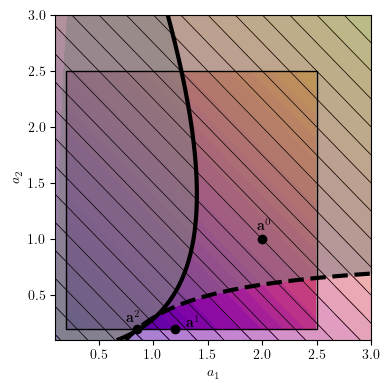

In [10]:
import torch
import matplotlib.pyplot as plt
from utils import plot_contours

plt.rcParams["text.usetex"] = True
torch.set_default_dtype(torch.double)


def f(a):
    return a[..., 0] + a[..., 1]


def g(a):
    return (
        8 / (16 * a[..., 0] + 9 * a[..., 1])
        - 4.5 / (9 * a[..., 0] + 16 * a[..., 1])
        - 0.1
    )


def CONLIN(func, a_k, a):
    a_lin = a_k.clone().requires_grad_()
    grads = torch.autograd.grad(func(a_lin).sum(), a_lin)[0]
    res = func(a_k) * torch.ones_like(a[..., 0])
    for i, grad in enumerate(grads):
        if grad < 0:
            gamma = a_k[i] / a[..., i]
        else:
            gamma = 1
        res += grad * gamma * (a[..., i] - a_k[i])
    return res


aa = torch.linspace(0.1, 3.0, 200)
a = torch.stack(torch.meshgrid(aa, aa, indexing="xy"), dim=2)

a_lower = torch.tensor([0.2, 0.2])
a_upper = torch.tensor([2.5, 2.5])

a_0 = torch.tensor([2.0, 1.0])
a_1 = torch.tensor([1.2, 0.2])
a_2 = torch.tensor([0.85, 0.2])
g_0 = CONLIN(g, a_0, a)
g_1 = CONLIN(g, a_1, a)

plot_contours(a[..., 0], a[..., 1], f(a), figsize=(4.0, 4.0), box=[a_lower, a_upper])
plt.contour(aa, aa, g(a), [0], colors="k", linewidths=3)
plt.contourf(aa, aa, g(a), [0, 1], colors="gray", alpha=0.5)
plt.contour(aa, aa, g_1, [0], colors="k", linewidths=3, linestyles="--")
plt.contourf(aa, aa, g_1, [0, 1], colors="gray", alpha=0.5)
plt.plot([a_0[0]], [a_0[1]], "o", color="black")
plt.annotate("$\mathbf{a}^0$", (1.95, 1.07), color="black")
plt.plot([a_1[0]], [a_1[1]], "o", color="black")
plt.annotate("$\mathbf{a}^1$", (1.3, 0.21), color="black")
plt.plot([a_2[0]], [a_2[1]], "o", color="black")
plt.annotate("$\mathbf{a}^2$", (0.75, 0.25), color="black")
plt.xlabel("$a_1$")
plt.ylabel("$a_2$")
plt.tight_layout()
plt.savefig("figures/four_bar_eaample_1.pdf", transparent=True)
plt.plot()


[]

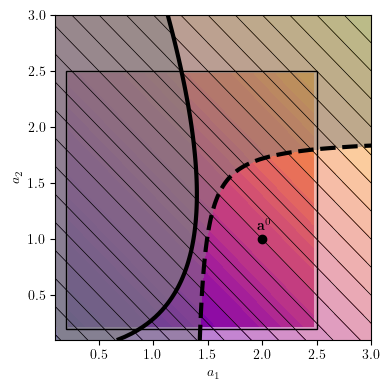

In [11]:
def MMA(func, a_k, L_k, U_k, a):
    a_lin = a_k.clone().requires_grad_()
    grads = torch.autograd.grad(func(a_lin).sum(), a_lin)[0]
    res = func(a_k)*torch.ones_like(a[...,0])
    for j, grad in enumerate(grads):
        if grad < 0:
            p = 0 
            q = -(a_k[j]-L_k[j])**2 * grad
        else:
            p = (U_k[j]-a_k[j])**2 * grad
            q = 0
        res -= p/(U_k[j]-a_k[j]) + q/(a_k[j]-L_k[j])
        res += p/(U_k[j]-a[...,j]) + q/(a[...,j]-L_k[j])
    return res

aa = torch.linspace(0.1, 3.0, 100)
a = torch.stack(torch.meshgrid(aa, aa, indexing="xy"), dim=2)

a_0 = torch.tensor([2.0, 1.0])
a_min = torch.tensor([0.2, 0.2])
a_maa = torch.tensor([2.5, 2.5])
s0 = 0.5
L_0 = a_0 - s0 * (a_maa-a_min)
U_0 = a_0 + s0 * (a_maa-a_min)
g_0 = MMA(g, a_0, L_0, U_0, a) 
g_0[a[...,0]<L_0[0]] = 1.0
g_0[a[...,1]>U_0[1]] = 1.0


plot_contours(a[..., 0], a[..., 1], f(a), figsize=(4.0, 4.0), box=[a_lower, a_upper])
plt.contour(aa, aa, g(a), [0], colors="k", linewidths=3)
plt.contourf(aa, aa, g(a), [0,1], colors="gray", alpha=0.5)
plt.contour(aa, aa, g_0, [0], colors="k", linewidths=3, linestyles="--")
plt.contourf(aa, aa, g_0, [0,10], colors="gray", alpha=0.5)
plt.plot([a_0[0]],[a_0[1]], "o", color="black")
plt.annotate("$\mathbf{a}^0$", (1.95, 1.07), color="black")
plt.xlabel("$a_1$")
plt.ylabel("$a_2$")
plt.tight_layout()
plt.savefig("figures/four_bar_eaample_mma_1.pdf", transparent=True)
plt.plot()